In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
Boston=pd.read_csv('C:Desktop/Boston.csv')

In [4]:
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
Boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
#Drooping column "Unnamed"

In [6]:
Boston.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [8]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#Understanding the variables in the Dataset

1.CRIM - per capita crime rate by town
2.ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3.INDUS - proportion of non-retail business acres per town.
4.CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.NOX - nitric oxides concentration (parts per 10 million)
6.RM - average number of rooms per dwelling
7.AGE - proportion of owner-occupied units built prior to 1940
8.DIS - weighted distances to five Boston employment centres
9.RAD - index of accessibility to radial highways
10.TAX - full-value property-tax rate per $10,000
11.PTRATIO - pupil-teacher ratio by town
12.B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13.LSTAT - % lower status of the population
14.MEDV - Median value of owner-occupied homes in $1000's


In [9]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [10]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#Dividing the dataset into train & Test

In [13]:
X=Boston.drop(columns=['medv'])

In [15]:
Y=Boston['medv']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
trainX,testX,trainY,testY=train_test_split(X,Y,test_size=0.3,random_state=565)

In [19]:
RF=RandomForestRegressor()

In [20]:
RF.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
#Training Accuracy wrt to R2 Score

In [22]:
Train_Acc_RF=pd.DataFrame({'act':trainY,'pred':RF.predict(trainX)})

In [24]:
r2_score(trainY,Train_Acc_RF.pred)

0.982304563786978

In [28]:
#Testing Accuracy

In [29]:
Test_Acc_RF=pd.DataFrame({'actual':testY,'pred':RF.predict(testX)})

In [30]:
r2_score(testY,Test_Acc_RF.pred)

0.9096447938272465

In [31]:
# We seem to have a great accuracy wrt to the Training & Testing Scores

In [33]:
# Lets even try to plot the graph of the feature importance as well

In [34]:
Feat_imp=pd.Series(RF.feature_importances_,index=X.columns)

In [35]:
Feat_imp=Feat_imp.nlargest(10)

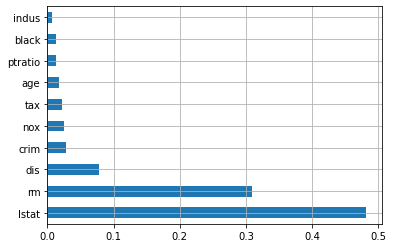

In [37]:
Feat_imp.plot(kind='barh')
plt.grid(True)

In [38]:
#We could even try to build a stable model using Grid Search CV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
GridSearchCV?

In [78]:
param_grid={'max_depth':[5,6,7,8],'max_leaf_nodes':[6,7,8]}

In [79]:
Hyper_Tuned_RF=GridSearchCV(RandomForestRegressor(),param_grid=param_grid,cv=10)

In [80]:
Hyper_Tuned_RF.fit(trainX,trainY)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [81]:
Hyper_Tuned_RF.best_params_

{'max_depth': 5, 'max_leaf_nodes': 8}

In [82]:
#Training Accuracy

In [83]:
r2_score(trainY,Hyper_Tuned_RF.predict(trainX))

0.8871123601848567

In [84]:
#Testing Accuracy

In [85]:
r2_score(testY,Hyper_Tuned_RF.predict(testX))

0.8615160631031453

In [86]:
#Though the accuracy seems a little low as compared to the original Random Forest model, hypertuned model seems very stable. 

In [87]:
# We will go with the Hypertuned model which has a quite similar Train & Test Accuracies. 

In [89]:
#Predicting the random values from the model. 

In [96]:
Hyper_Tuned_RF.predict([[0.02731,0,7.07,0,.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14]])[0]

22.141035326935917

In [97]:
#Saving this model in pickle file for deployment for later use

In [98]:
import pickle

In [99]:
with open('RFBoston.pickle','wb') as f:
    pickle.dump(Hyper_Tuned_RF,f)

In [100]:
with open('RFBoston.pickle','rb') as f:
    
    M=pickle.load(f)

In [101]:
M.predict([[0.02731,0,7.07,0,.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14]])[0]

22.141035326935917

In [102]:
#The End#